Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
len(transactions)

2935849

In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items[items.item_category_id == 20]

,item_name,item_id,item_category_id
1386,"Alien: Isolation [PS4, русская версия]",1386,20
1389,"Alien: Isolation. Nostromo Edition [PS4, русск...",1389,20
1415,"Angry Birds Star Wars [PS4, русская версия]",1415,20
1496,"Assassin's Creed IV. Черный флаг [PS4, русская...",1496,20
1501,Assassin's Creed IV. Черный флаг. Bonus Editio...,1501,20
1514,Assassin's Creed IV. Черный флаг. Специальное ...,1514,20
1540,"Assassin's Creed: Единство [PS4, русская версия]",1540,20
1542,Assassin's Creed: Единство. Bastille Edition [...,1542,20
1545,Assassin's Creed: Единство. Guillotine Edition...,1545,20
1549,Assassin's Creed: Единство. Notre Dame Edition...,1549,20


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [10]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [11]:
# YOUR CODE GOES HEREgroupby
transactions[['day', 'month', 'year']] = pd.DataFrame([ x.split('.') for x in transactions['date'].tolist()])
transactions.drop('date', inplace=True, axis = 1)
transactions['rev'] = transactions.item_price * transactions.item_cnt_day
# transactions['rev'] = transactions['item_cnt_day']* transactions['item_price']
# rev = pd.DataFrame(transactions.groupby(['shop_id','month','year'])['rev'].sum())
# rev.iloc[(rev.index.get_level_values('month') == '09') & (rev.index.get_level_values('year') == '2014')].max()
# avg = pd.DataFrame(transactions.groupby(['shop_id','month'])['item_cnt_day'].mean())
max_revenue = transactions[(transactions.year == '2014') & (transactions.month == '09')].groupby('shop_id')['rev'].sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [21]:
# YOUR CODE GOES HERE
shop_rev_3momths = pd.DataFrame(transactions[(transactions.year == '2014') & ((transactions.month == '06') | (transactions.month == '07') |
                                            (transactions.month == '08'))])
rev3 = pd.merge(shop_rev_3momths, items, how = 'right', on= 'item_id')
category_id_with_max_revenue = rev3.groupby('item_category_id')['rev'].sum().idxmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


In [23]:
rev3.groupby('item_category_id')['rev'].sum()

item_category_id
0             NaN
1             NaN
2      2755520.00
3      6854669.80
4        38833.20
5       418233.10
6      3360382.50
7             NaN
8       433200.00
9       291426.84
10            NaN
11     4970925.00
12    31385229.70
13        4686.00
14     2337794.30
15     5047875.80
16      191141.00
17      167175.00
18            NaN
19    26237112.15
20    32157302.43
21      991094.01
22     2958475.70
23    19896624.03
24            NaN
25     1032434.35
26            NaN
27            NaN
28     8868913.27
29     2286658.00
         ...     
54      128975.00
55     9468644.35
56      493331.10
57      850384.80
58     1813753.20
59        9549.00
60      327909.00
61      698523.80
62     2005028.90
63     3921749.95
64     3340694.95
65     2015607.90
66         730.00
67     2418752.20
68            NaN
69     2268859.50
70      820233.65
71       93940.25
72     6167981.40
73     1884406.20
74            NaN
75     5950283.30
76      904313.00
77        7

In [20]:
rev3.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,rev,item_name,item_category_id
0,17.0,26.0,9532,399.0,1.0,15,06,2014,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,17.0,26.0,9532,399.0,1.0,03,06,2014,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,17.0,26.0,9532,399.0,1.0,08,06,2014,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,17.0,26.0,9532,399.0,1.0,11,06,2014,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,17.0,26.0,9532,399.0,1.0,19,06,2014,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [13]:
# YOUR CODE GOES HERE

# num_items_constant_price = (transactions['item_price'].groupby(transactions['item_id']).nunique() == 1).sum()# PUT YOUR ANSWER IN THIS VARIABLE
val = transactions['item_price'].groupby(transactions['item_id']).apply(lambda y: np.std(y))
num_items_constant_price = val[val ==0 ].value_counts()[0]
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


In [34]:
v = transactions['item_price'].groupby(transactions['item_id']).apply(lambda y: np.std(y))



In [35]:
v[v==0].value_counts()

0.0    5926
Name: item_price, dtype: int64

In [32]:
transactions['item_price'].groupby(transactions['item_id']).std()

item_id
0               NaN
1          0.000000
2          0.000000
3         29.698485
4               NaN
5               NaN
6               NaN
7               NaN
8          0.000000
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27       609.841594
28       118.175814
29       612.603954
            ...    
22140     95.886434
22141     39.823497
22142      0.000000
22143     27.692143
22144    103.614978
22145     78.471307
22146     63.700424
22147     24.772787
22148      0.000000
22149     35.750889
22150     14.803586
22151     45.732343
22152     13.628476
22153     64.551103
22154    336.466008
22155     99.053867
22156      0.000000
22157     44.124823
22158       

In [30]:
f = transactions['item_price'].groupby(transactions['item_id'])

In [31]:
j = 0
for i in f:
    j+=1
    print(i)
    if j >5:
        break
    

(0, 1972636    58.0
Name: item_price, dtype: float64)
(1, 1552550    4490.0
1552605    4490.0
1815470    4490.0
1906681    4490.0
2021246    4490.0
2069410    4490.0
Name: item_price, dtype: float64)
(2, 1909010    58.0
2124282    58.0
Name: item_price, dtype: float64)
(3, 1812448    100.0
1909009     58.0
Name: item_price, dtype: float64)
(4, 1972624    58.0
Name: item_price, dtype: float64)
(5, 2280990    28.0
Name: item_price, dtype: float64)


In [15]:
val_counts

0.0    5926
Name: item_price, dtype: int64

In [16]:
val1 = transactions['item_price'].groupby(transactions['item_id']).std()
val1_counts = val1[val1 == 0].value_counts()
val1_counts

0.0    3555
Name: item_price, dtype: int64

In [17]:
val[val == 0].value_counts()

0.0    5926
Name: item_price, dtype: int64

In [18]:
np.std(np.float(transactions[transactions['item_id'] == 0]['item_price']))

0.0

In [19]:
for i in x:
    print(i)

NameError: name 'x' is not defined

In [ ]:
np.std(58.0)

In [ ]:
np.var(transactions[(transactions['shop_id'] == 25) & ((transactions['year'] == '2014') & (transactions['month'] == '12'))],ddof=1)['item_cnt_day']

In [ ]:
transactions[(transactions['shop_id'] == 25) & (transactions['year'] == '2015')]

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [ ]:
transactions['item_cnt_day'].isnull().values.any()

In [39]:
transactions[(transactions['shop_id'] == 25) & ((transactions['year'] == '2014') & (transactions['month'] == '12'))]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,rev
2295837,23,25,21752,399.00,1.0,14,12,2014,399.00
2295838,23,25,21752,399.00,3.0,13,12,2014,1197.00
2295839,23,25,21733,149.00,1.0,26,12,2014,149.00
2295840,23,25,21732,149.00,1.0,31,12,2014,149.00
2295841,23,25,21726,149.00,1.0,30,12,2014,149.00
2295842,23,25,21726,149.00,1.0,23,12,2014,149.00
2295843,23,25,21726,149.00,1.0,20,12,2014,149.00
2295844,23,25,21726,149.00,1.0,19,12,2014,149.00
2295845,23,25,21726,149.00,1.0,09,12,2014,149.00
2295846,23,25,21799,999.00,1.0,25,12,2014,999.00


In [42]:
lmask[['item_cnt_day','day']]

,item_cnt_day,day
2295837,1.0,14
2295838,3.0,13
2295839,1.0,26
2295840,1.0,31
2295841,1.0,30
2295842,1.0,23
2295843,1.0,20
2295844,1.0,19
2295845,1.0,09
2295846,1.0,25


In [44]:
lmask[['item_cnt_day','day']].groupby('day').sum()

,item_cnt_day
day,
01,153.0
02,169.0
03,195.0
04,164.0
05,300.0
06,350.0
07,325.0
08,209.0
09,204.0


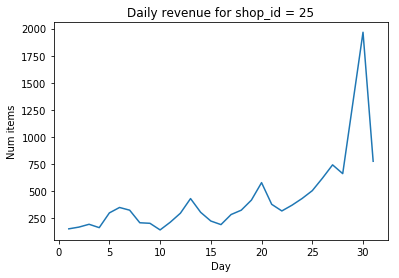

Current answer for task total_num_items_sold_var is: 117167.702299


In [48]:
shop_id = 25
lmask = transactions[(transactions['shop_id'] == 25) & ((transactions['year'] == '2014') & (transactions['month'] == '12'))]
total_num_items_sold = lmask[['item_cnt_day','day']].groupby('day').sum() #transactions[(transactions['shop_id'] == 25) & ((transactions['year'] == '2014') & (transactions['month'] == '12'))]
days = total_num_items_sold.index.get_values() # YOUR CODE GOES HERE
# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold,ddof=1)['item_cnt_day']# YOUR CODE GOES HERE# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [49]:
STUDENT_EMAIL = 'shaukathussain1@hotmail.com'
STUDENT_TOKEN = 'bfP5Lgyteat1JSDg'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [50]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)